Installing Package

In [ ]:
pip install wikipedia
pip install fpdf
pip install pypdf2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11695 sha256=208c6eb2cc731e0f6bb7b24c5697d4102c725118a807e5e961a5fdd9c2226378
  Stored in directory: /root/.cache/pip/wheels/15/93/6d/5b2c68b8a64c7a7a04947b4ed6d89fb557dcc6bc27d1d7f3ba
Successfully built wikipedia


Enter the Topic one by one and Create the PDF for individual Topic

In [ ]:
import wikipedia
from fpdf import FPDF

list1=[]
title1=[]

article=input("enter the topic to get pdf documents:")
wiki_lst=''
#title=[]
wiki_lst=wiki_lst+(wikipedia.page(article).summary)
#title.append(article)
n=100
li=[]
for i in range(0, len(wiki_lst), n):
    li.append(wiki_lst[i: i + n])

pdf = FPDF()
pdf.add_page()
for j in li:
    pdf.set_font("Arial", size = 10)
    pdf.cell(200, 10, txt = j,ln = 1, align = 'C')
pdf.output(str(article)+".pdf")
l=str(article)+".pdf"

enter the topic to get pdf documents:data science


In [ ]:
title1.append(article)
list1.append(l)
print(list1)

['swimming.pdf', 'hockey.pdf', 'football.pdf', 'financial technology.pdf', 'facebook.pdf', 'business.pdf', 'basketball.pdf', 'data science.pdf']


*Reading the all Pdf file*

In [ ]:
import PyPDF2
wiki=[]
for i in list1:
  pdfFileObj = open(i, 'rb')

  pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
  # print(pdfReader.numPages)
  pageObj = pdfReader.getPage(0)
  list2 = pageObj.extractText()
  print(list2)
  # closing the pdf file object
  wiki.append(list2)
  pdfFileObj.close()

Swimming is the self-propulsion of a person through water, or other liquid, usually for recreation, 
sport, exercise, or survival.  Locomotion is achieved through coordinated movement of the limbs and 
the body to achieve hydrodynamic thrust which results in directional motion. Humans can hold their b
reath underwater and undertake rudimentary locomotive swimming within weeks of birth, as a survival 
response.Swimming is consistently among the top public recreational activities, and in some countrie
s, swimming lessons are a compulsory part of the educational curriculum.  As a formalized sport, swi
mming is featured in a range of local, national, and international competitions, including every mod
ern Summer Olympics.
Swimming involves repeated motions known as strokes in order to propel the body
 forward. While the front crawl is widely regarded as the fastest out of four primary strokes, other
 strokes are practiced for special purposes, such as for training.
There are various risks 

*Printing the wiki list to ensure*

In [ ]:
import pandas as pd
import wikipedia
print("examine content")
wiki

examine content


['Swimming is the self-propulsion of a person through water, or other liquid, usually for recreation, \nsport, exercise, or survival.  Locomotion is achieved through coordinated movement of the limbs and \nthe body to achieve hydrodynamic thrust which results in directional motion. Humans can hold their b\nreath underwater and undertake rudimentary locomotive swimming within weeks of birth, as a survival \nresponse.Swimming is consistently among the top public recreational activities, and in some countrie\ns, swimming lessons are a compulsory part of the educational curriculum.  As a formalized sport, swi\nmming is featured in a range of local, national, and international competitions, including every mod\nern Summer Olympics.\nSwimming involves repeated motions known as strokes in order to propel the body\n forward. While the front crawl is widely regarded as the fastest out of four primary strokes, other\n strokes are practiced for special purposes, such as for training.\nThere are v

_Document Cluster step by step !!!_

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words={'english'})
X = vectorizer.fit_transform(wiki)

*Using KMeans Elbow method we are finding the optimal K Value*

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

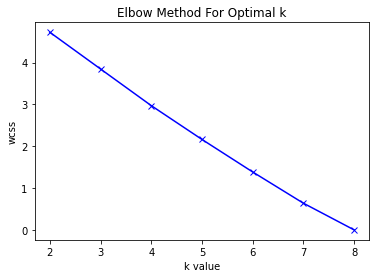

In [ ]:
wcss = []
K = range(2,9)
for k in K:
    km = KMeans(n_clusters=k, max_iter=200, n_init=10)
    km = km.fit(X)
    wcss.append(km.inertia_)

plt.plot(K, wcss, 'bx-')
plt.xlabel('k value')
plt.ylabel('wcss')
plt.title('Elbow Method For Optimal k')
plt.show()

Document clustering using KMeans Algorithm

In [ ]:
true_k = 6
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
model.fit(X)
labels=model.labels_
wiki_cl=pd.DataFrame(list(zip(title1,labels)),columns=['title','cluster'])
print(wiki_cl.sort_values(by=['cluster']))

                  title  cluster
7          data science        0
1                hockey        1
2              football        1
6            basketball        1
0              swimming        2
5              business        3
3  financial technology        4
4              facebook        5


List Shows the Number of cluster where the topic are belong to, for example hockey, football and basketball are the sports cluster(which are played in the land and swimming is in different cluster).

Used Word Cloud for the Visualization purpose(Additional).

Cluster: 0
Titles
data science


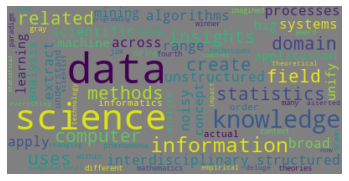

Cluster: 1
Titles
    hockey
  football
basketball


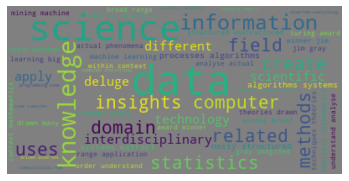

Cluster: 2
Titles
swimming


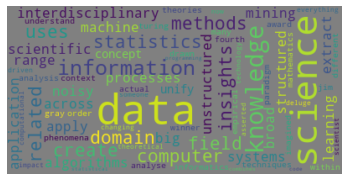

Cluster: 3
Titles
business


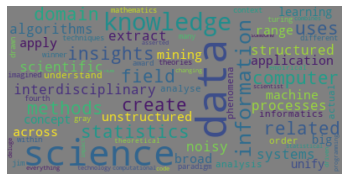

Cluster: 4
Titles
financial technology


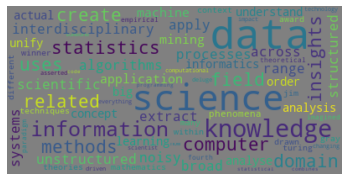

Cluster: 5
Titles
facebook


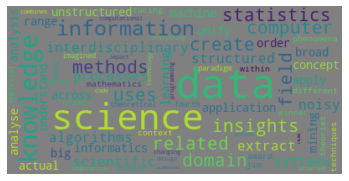

In [ ]:
from wordcloud import WordCloud
result={'cluster':labels,'wiki':wiki_lst}
result=pd.DataFrame(result)
for k in range(0,true_k):
    s=result[result.cluster==k]
    text=s['wiki'].str.cat(sep=' ')
    text=text.lower()
    text=' '.join([word for word in text.split()])
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="gray").generate(text)
    print('Cluster: {}'.format(k))
    print('Titles')
    titles=wiki_cl[wiki_cl.cluster==k]['title']
    print(titles.to_string(index=False))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()